In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
import re

In [4]:
# Load the dataset
df = pd.read_csv(r'C:\Users\HIRDYANSHI SINGH\Downloads\Tweets.csv')

# Display first 5 rows of the dataset
print(df.head())

# Display dataset information
print(df.info())

             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnar

In [5]:
# Check for missing values
print(df.isnull().sum())

# Select relevant columns
df = df[["text", "airline_sentiment"]]

# Clean the text data
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df["text"] = df["text"].apply(clean_text)

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64


[nltk_data] Downloading package stopwords to C:\Users\HIRDYANSHI
[nltk_data]     SINGH\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [6]:
# Convert text data into numerical data using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df["text"]).toarray()
y = df["airline_sentiment"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Initialize the Logistic Regression model
model_lr = LogisticRegression()

# Train the model
model_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

C:\Users\HIRDYANSHI SINGH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 80.33%

Classification Report:
              precision    recall  f1-score   support

    negative       0.82      0.94      0.88      1889
     neutral       0.69      0.48      0.57       580
    positive       0.81      0.63      0.71       459

    accuracy                           0.80      2928
   macro avg       0.77      0.68      0.72      2928
weighted avg       0.79      0.80      0.79      2928



In [8]:
# Initialize the Naive Bayes model
model_nb = MultinomialNB()

# Train the model
model_nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = model_nb.predict(X_test)

# Evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 74.56%

Classification Report:
              precision    recall  f1-score   support

    negative       0.74      0.98      0.84      1889
     neutral       0.73      0.26      0.38       580
    positive       0.89      0.39      0.54       459

    accuracy                           0.75      2928
   macro avg       0.78      0.54      0.59      2928
weighted avg       0.76      0.75      0.70      2928



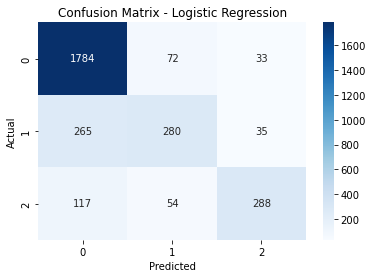

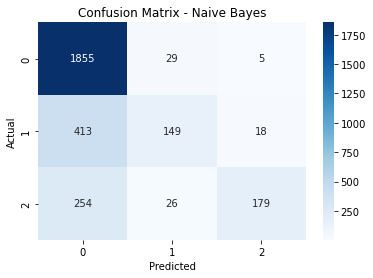

In [9]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()